In [37]:
import pickle
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\livia\OneDrive\Área de Trabalho\inspe\4_semestre\ml\projeto\ames\data


In [39]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [40]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [41]:
data = data.copy()

## Criação de variáveis combinadas

**Propósito:** ter uma visão geral de algum aspecto da casa, além de considerar cada um desses aspectos a parte

### Área total da casa

Soma das seguintes colunas que representam, respectivamente, as áreas do primeiro e segundo andar e do porão.

        1st Flr SF (Continuous): First Floor square feet
        2nd Flr SF (Continuous): Second floor square feet
        Total Bsmt SF (Continuous): Total square feet of basement area



In [42]:
data['TotalSF'] = data['X1st.Flr.SF'] + data['X2nd.Flr.SF'] + data['Total.Bsmt.SF']

### Total de banheiros

Soma das colunas que representam o número de banheiros da casa

        Bsmt Full Bath (Discrete): Basement full bathrooms
        Bsmt Half Bath (Discrete): Basement half bathrooms
        Full Bath (Discrete): Full bathrooms above grade
        Half Bath (Discrete): Half baths above grade

Foi multiplicado a quantidade de "meios banheiros" (*half bathrooms*) por $0.5$, posto que por serem menores o peso deles foi considerado como a metade de um banheiro completo (*full bathroom*)

In [43]:
data['TotalBath'] = data['Full.Bath'] + 0.5 * data['Half.Bath'] + data['Bsmt.Full.Bath'] + 0.5 * data['Bsmt.Half.Bath']

### Área total da varanda

Soma das colunas que representam as áreas dos diferentes tipos de "varanda" da casa

        Open Porch SF (Continuous): Open porch area in square feet
        Enclosed Porch (Continuous): Enclosed porch area in square feet
        3-Ssn Porch (Continuous): Three season porch area in square feet
        Screen Porch (Continuous): Screen porch area in square feet


In [44]:
data["All.Porch.SF"] = data["Open.Porch.SF"] + data["Enclosed.Porch"] + data["X3Ssn.Porch"] + data["Screen.Porch"]

## Transformações matemáticas

### Log da Área Total

In [45]:
data['TotalSFLog'] = np.log(data['TotalSF'])

In [46]:

data["All.SF"] = data["Gr.Liv.Area"] + data["Total.Bsmt.SF"]


data["AllSF-s2"] = data["All.SF"] ** 2
# data["Overall.Qual-s2"] = data["Overall.Qual"] ** 2
# data["All.FlrsSF-Sq"] = np.sqrt(data["AllFlrsSF"])
data["GrLivArea-s2"] = data["Gr.Liv.Area"] ** 2


## Retirando outliers

### Gr.Liv.Area

        Gr Liv Area (Continuous): Above grade (ground) living area square feet

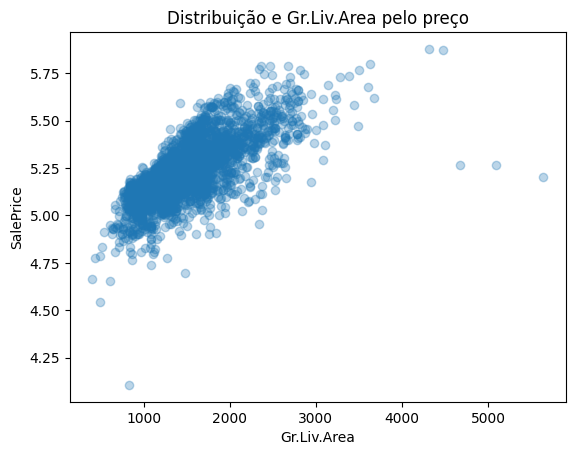

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(data['Gr.Liv.Area'], data['SalePrice'], alpha=0.3)
plt.title('Distribuição e Gr.Liv.Area pelo preço')
plt.xlabel('Gr.Liv.Area')
plt.ylabel('SalePrice')
plt.show()

In [48]:
(data['Gr.Liv.Area'] < 4000).value_counts()

Gr.Liv.Area
True     2724
False       5
Name: count, dtype: int64

Como há apenas 5 casas com *Gr.Liv.Area* maior do que 4000, enquanto todo a maioria se concentra entre 1000 e 3000, optamos por retirar essas residêcias para que seus valores não viesiem negativamente o resultado

In [49]:
data = data[data['Gr.Liv.Area'] < 4000]

<Axes: >

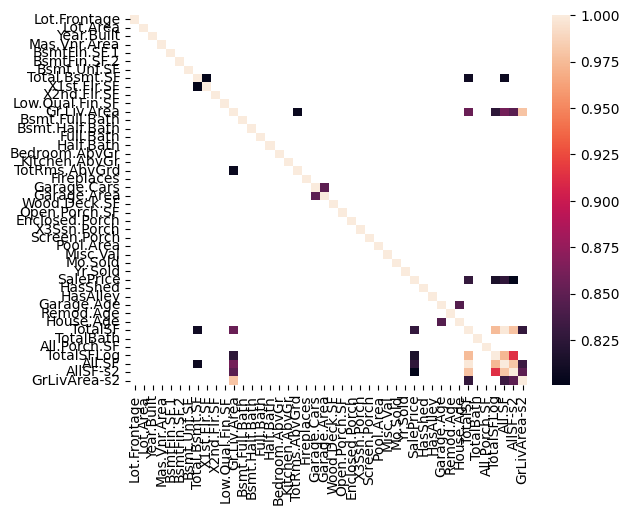

In [50]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr[corr>0.8], xticklabels=corr.columns, yticklabels=corr.columns)

In [51]:
minha_data_path = DATA_DIR / 'processed' / 'ames_minha1.pkl'

In [52]:
with open(minha_data_path, 'wb') as file:
    pickle.dump(data, file)